<a href="https://colab.research.google.com/github/minji0620/sk_broadband/blob/main/eda/iptv_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the uploaded dataset
file_path = "/content/renew_iptv_sampled_data.csv"
df = pd.read_csv(file_path, encoding='cp949')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ContractPVCName                            50000 non-null  object 
 1   ResidenceBuildingTypeCode                  50000 non-null  object 
 2   MonthlyDeviceNumber                        32947 non-null  float64
 3   TotalOctetReceived                         32947 non-null  float64
 4   TotalOctetTransmitted                      32947 non-null  float64
 5   Gender                                     50000 non-null  object 
 6   ReAgreementYesNo                           42648 non-null  object 
 7   TransferYesNo                              50000 non-null  object 
 8   WifiSubscriptionYesNo                      41903 non-null  object 
 9   MobilePackageYesNo                         41903 non-null  object 
 10  KidsHouseYesNo        

(None,
   ContractPVCName ResidenceBuildingTypeCode  MonthlyDeviceNumber  \
 0              울산                        A2                  NaN   
 1              경북                        A2                  3.0   
 2              부산                        A2                  NaN   
 3              세종                        A2                 17.0   
 4              경북                        B1                  3.0   
 
    TotalOctetReceived  TotalOctetTransmitted Gender ReAgreementYesNo  \
 0                 NaN                    NaN      M                Y   
 1        3.056226e+08           1.021886e+10      F                N   
 2                 NaN                    NaN      M              NaN   
 3        5.893714e+10           4.047941e+09      M                Y   
 4        4.241321e+09           4.982939e+10      M                N   
 
   TransferYesNo WifiSubscriptionYesNo MobilePackageYesNo  ...  \
 0             Y                     N                  Y  ...   
 1   

#MonthlyDeviceNumber

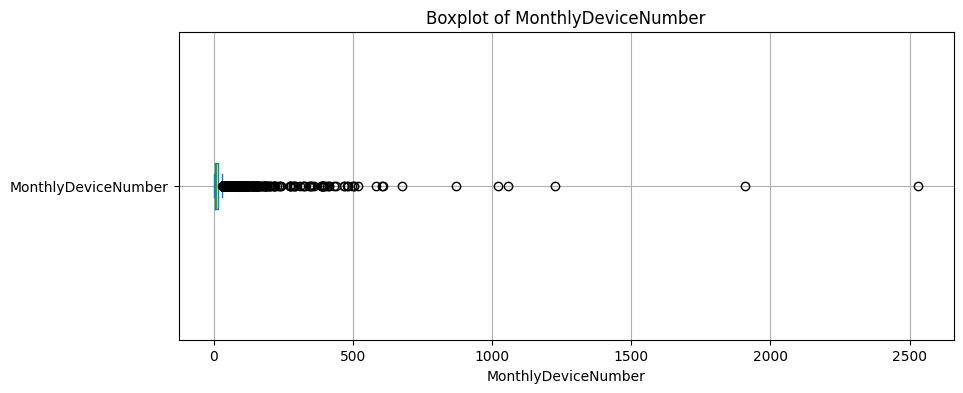

In [ ]:
# 이상치 확인을 위한 박스플롯
plt.figure(figsize=(10, 4))
df["MonthlyDeviceNumber"].plot(kind='box', vert=False)
plt.title("Boxplot of MonthlyDeviceNumber")
plt.xlabel("MonthlyDeviceNumber")
plt.grid(True)
plt.show()

상위 1% 이상치 제거

<Figure size 1000x500 with 0 Axes>

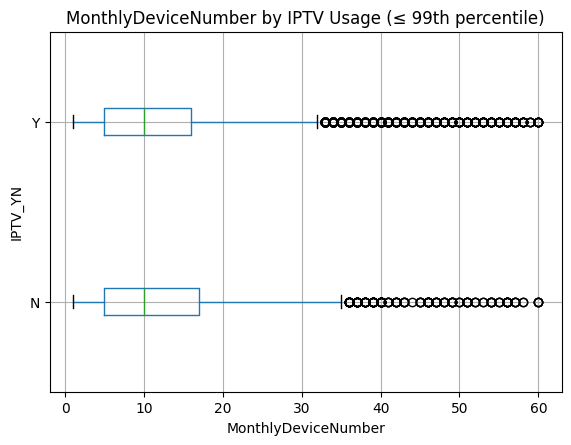

,MonthlyDeviceNumber
iptv_yn,
N,12.663524
Y,11.750299


In [ ]:
threshold_99 = df["MonthlyDeviceNumber"].quantile(0.99)

filtered_df = df[df["MonthlyDeviceNumber"] <= threshold_99]

# IPTV 사용 여부에 따른 boxplot
plt.figure(figsize=(10, 5))
filtered_df.boxplot(column="MonthlyDeviceNumber", by="iptv_yn", vert=False)
plt.title("MonthlyDeviceNumber by IPTV Usage (≤ 99th percentile)")
plt.suptitle("")  # Remove the automatic title
plt.xlabel("MonthlyDeviceNumber")
plt.ylabel("IPTV_YN")
plt.grid(True)
plt.show()

# IPTV 사용 여부별 평균 계산
monthly_device_mean_by_iptv = filtered_df.groupby("iptv_yn")["MonthlyDeviceNumber"].mean()
monthly_device_mean_by_iptv

iptv를 사용하지 않는 고객 그룹에서 접속 기기 대수가 약간 더 많은 것을 확인할 수 있습니다

boxplot에서 이상치 기준인 28대 미만 필터링

<Figure size 1000x500 with 0 Axes>

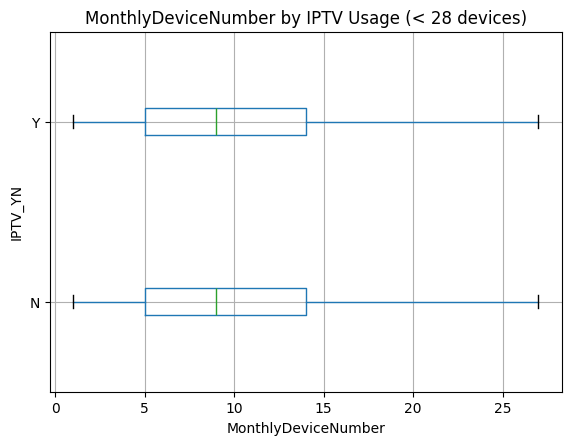

,MonthlyDeviceNumber
iptv_yn,
N,10.095254
Y,10.202548


In [ ]:
# MonthlyDeviceNumber가 28대 미만인 경우만 필터링
filtered_under_28 = df[df["MonthlyDeviceNumber"] < 28]

# IPTV 사용 여부에 따른 boxplot
plt.figure(figsize=(10, 5))
filtered_under_28.boxplot(column="MonthlyDeviceNumber", by="iptv_yn", vert=False)
plt.title("MonthlyDeviceNumber by IPTV Usage (< 28 devices)")
plt.suptitle("")  # Remove the automatic title
plt.xlabel("MonthlyDeviceNumber")
plt.ylabel("IPTV_YN")
plt.grid(True)
plt.show()

# IPTV 사용 여부별 평균 계산
monthly_device_mean_under_28 = filtered_under_28.groupby("iptv_yn")["MonthlyDeviceNumber"].mean()
monthly_device_mean_under_28

#TotalReceived_GB/ TotalTransmitted_GB

In [ ]:
# 옥텟(바이트)을 GB로 변환: 1GB = 1,073,741,824 바이트
BYTES_PER_GB = 1073741824

df["TotalReceived_GB"] = df["TotalOctetReceived"] / BYTES_PER_GB
df["TotalTransmitted_GB"] = df["TotalOctetTransmitted"] / BYTES_PER_GB

바이트 -> 기가바이트로 변환

상위 1% 이상치 제거

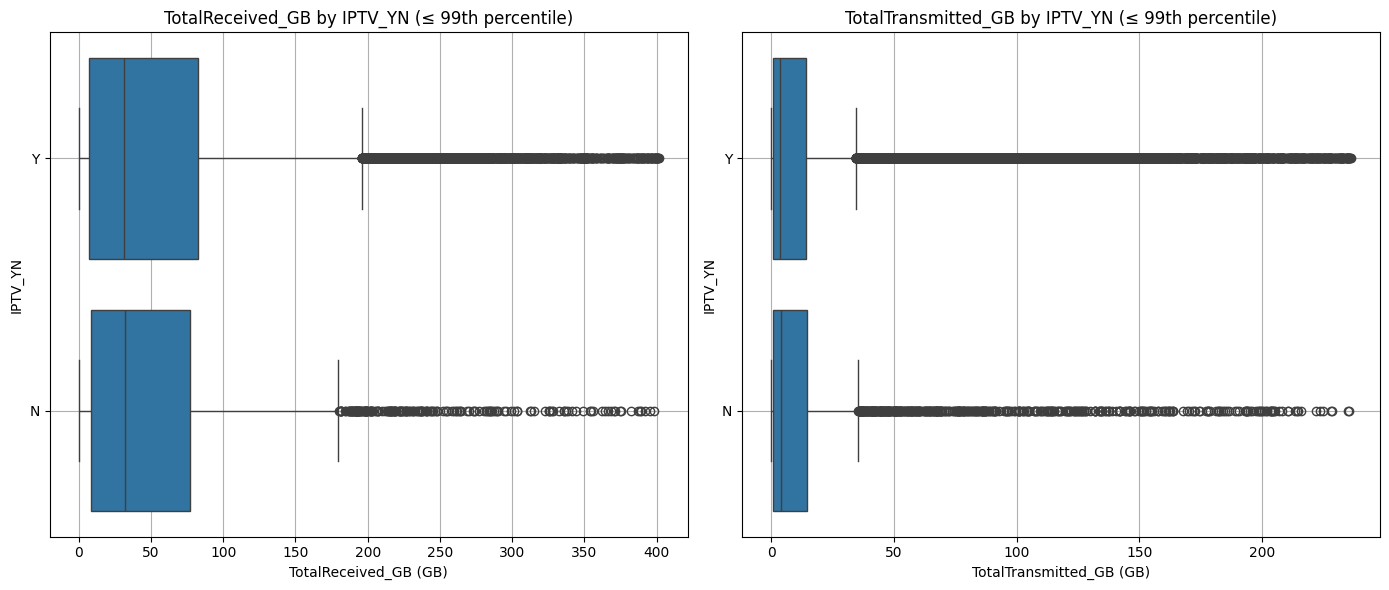

In [ ]:
# 상위 1% 컷오프 계산
received_99th = df["TotalReceived_GB"].quantile(0.99)
transmitted_99th = df["TotalTransmitted_GB"].quantile(0.99)

# 각각 수신량과 송신량 1% 이상치 제거한 데이터프레임
df_received_filtered = df[df["TotalReceived_GB"] <= received_99th]
df_transmitted_filtered = df[df["TotalTransmitted_GB"] <= transmitted_99th]

# 박스플롯 시각화
plt.figure(figsize=(14, 6))

# 수신량 기준 필터링 후 박스플롯
plt.subplot(1, 2, 1)
sns.boxplot(data=df_received_filtered, x="TotalReceived_GB", y="iptv_yn", orient="h")
plt.title("TotalReceived_GB by IPTV_YN (≤ 99th percentile)")
plt.xlabel("TotalReceived_GB (GB)")
plt.ylabel("IPTV_YN")
plt.grid(True)

# 송신량 기준 필터링 후 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(data=df_transmitted_filtered, x="TotalTransmitted_GB", y="iptv_yn", orient="h")
plt.title("TotalTransmitted_GB by IPTV_YN (≤ 99th percentile)")
plt.xlabel("TotalTransmitted_GB (GB)")
plt.ylabel("IPTV_YN")
plt.grid(True)

plt.tight_layout()
plt.show()

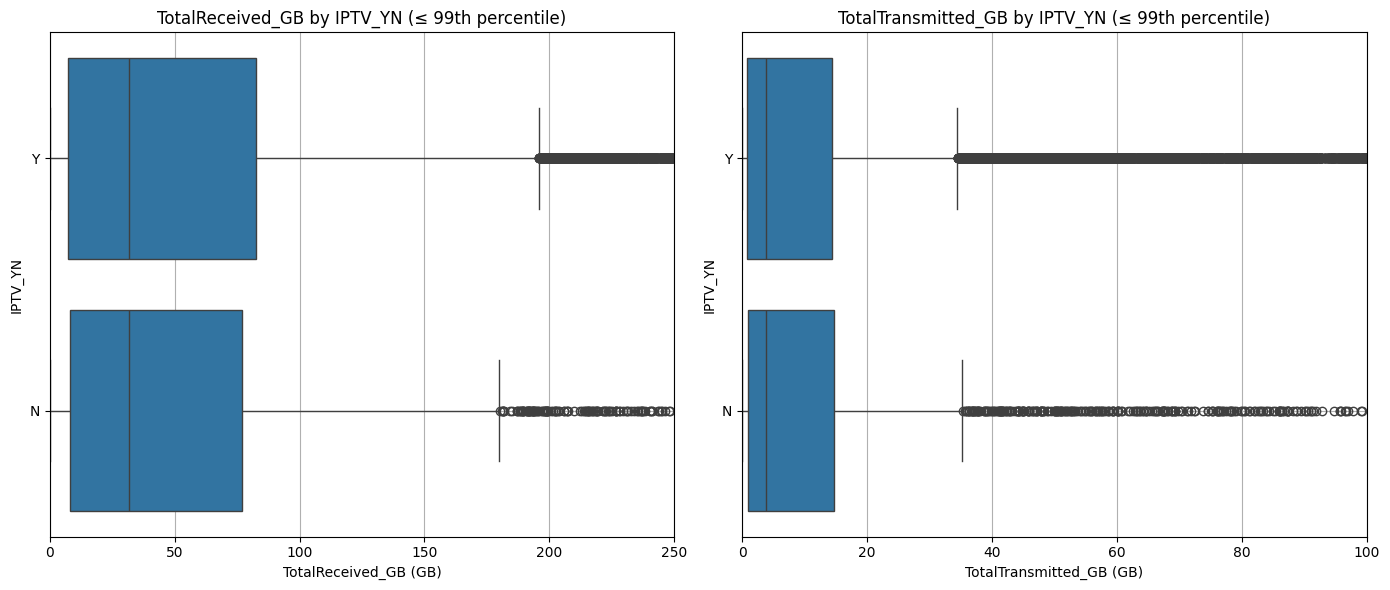

In [ ]:
# 박스플롯 시각화 (x축 범위 제한 포함)
plt.figure(figsize=(14, 6))

# 수신량 기준 필터링 후 박스플롯
plt.subplot(1, 2, 1)
sns.boxplot(data=df_received_filtered, x="TotalReceived_GB", y="iptv_yn", orient="h")
plt.title("TotalReceived_GB by IPTV_YN (≤ 99th percentile)")
plt.xlabel("TotalReceived_GB (GB)")
plt.ylabel("IPTV_YN")
plt.xlim(0, 250)
plt.grid(True)

# 송신량 기준 필터링 후 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(data=df_transmitted_filtered, x="TotalTransmitted_GB", y="iptv_yn", orient="h")
plt.title("TotalTransmitted_GB by IPTV_YN (≤ 99th percentile)")
plt.xlabel("TotalTransmitted_GB (GB)")
plt.ylabel("IPTV_YN")
plt.xlim(0, 100)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
received_mean_by_iptv = df_received_filtered.groupby("iptv_yn")["TotalReceived_GB"].mean()
transmitted_mean_by_iptv = df_transmitted_filtered.groupby("iptv_yn")["TotalTransmitted_GB"].mean()

mean_df = pd.DataFrame({
    "TotalReceived_GB": received_mean_by_iptv,
    "TotalTransmitted_GB": transmitted_mean_by_iptv
}).round(2)

mean_df

,TotalReceived_GB,TotalTransmitted_GB
iptv_yn,,
N,54.80,18.35
Y,57.15,18.71


송신량은 iptv 이용 여부에 따른 두 고객 그룹간 별 차이를 보이지 않았고, 수신량은 iptv이용 고객 그룹이 조금 더 많은 것을 확인할 수 있었습니다

#InternetCount/ WingsCount

In [ ]:
internet_count_by_iptv = df.groupby("iptv_yn")["InternetCount"].value_counts(dropna=False).unstack().fillna(0).astype(int)
internet_count_by_iptv

InternetCount,0,1,2,3,4
iptv_yn,,,,,
N,0,5383,33,1,3
Y,21967,22490,116,6,1


**InternetCount가 0인 고객은 전부 iptv를 사용합니다**

<ipython-input-35-4e4575e6bd2d>:31: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-35-4e4575e6bd2d>:31: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


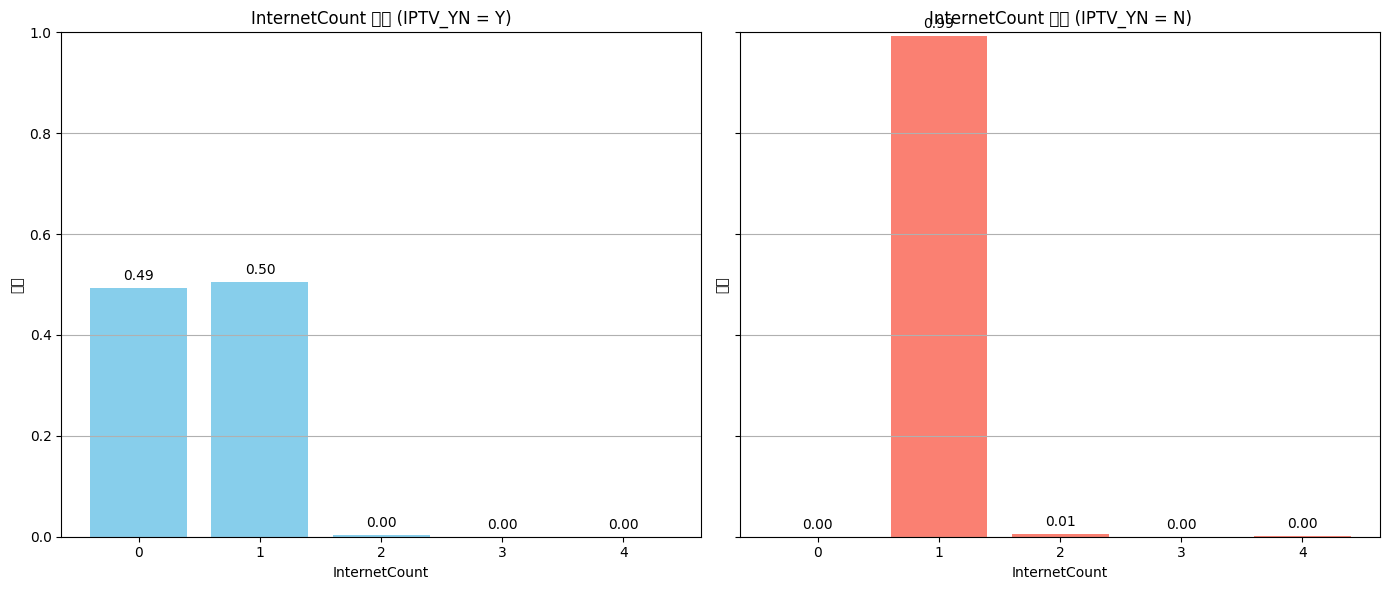

In [ ]:
# IPTV_YN 별 InternetCount 비율 계산
internet_count_ratio_by_iptv = (
    df.groupby("iptv_yn")["InternetCount"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# 막대그래프 그리기 (IPTV_YN = 'Y'와 'N' 각각 따로)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = {"Y": "skyblue", "N": "salmon"}

for i, iptv_value in enumerate(["Y", "N"]):
    ax = axes[i]
    data = internet_count_ratio_by_iptv.loc[iptv_value]
    bars = ax.bar(data.index.astype(str), data.values, color=colors[iptv_value])

    ax.set_title(f"InternetCount 비율 (IPTV_YN = {iptv_value})")
    ax.set_xlabel("InternetCount")
    ax.set_ylabel("비율")
    ax.set_ylim(0, 1)
    ax.grid(axis='y')

    # 막대 위에 비율 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
#iptv_yn별 InternetCount 평균
internetcount_mean = df_nonzero_internet.groupby("iptv_yn")["InternetCount"].mean()

internetcount_mean

,InternetCount
iptv_yn,
N,1.008118
Y,1.005793


인터넷 회선수는 iptv 유무와 관계없이 대부분 1개를 사용합니다 iptv 유무로 인해 인터넷 회선수의 차이는 보이지 않습니다

In [ ]:
df.groupby("iptv_yn")["WingsCount"].value_counts(normalize='index').unstack().fillna(0)

WingsCount,0,1,2
iptv_yn,,,
N,0.977306,0.022694,0.000000
Y,0.970345,0.029587,0.000067


<ipython-input-36-927b90191415>:31: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-927b90191415>:31: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


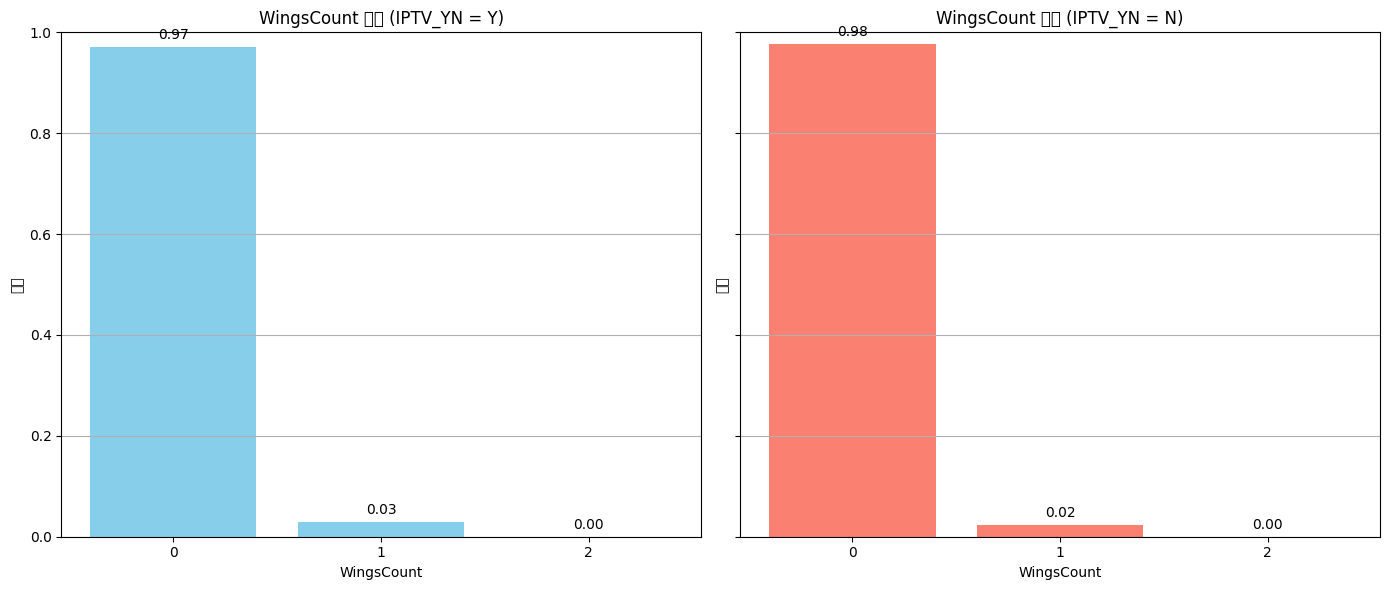

In [ ]:
# IPTV_YN 별 WingsCount 비율 계산
wings_count_ratio_by_iptv = (
    df.groupby("iptv_yn")["WingsCount"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# 막대그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = {"Y": "skyblue", "N": "salmon"}

for i, iptv_value in enumerate(["Y", "N"]):
    ax = axes[i]
    data = wings_count_ratio_by_iptv.loc[iptv_value]
    bars = ax.bar(data.index.astype(str), data.values, color=colors[iptv_value])

    ax.set_title(f"WingsCount 비율 (IPTV_YN = {iptv_value})")
    ax.set_xlabel("WingsCount")
    ax.set_ylabel("비율")
    ax.set_ylim(0, 1)
    ax.grid(axis='y')

    # 막대 위에 비율 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


IPTV 사용 여부와 관계없이 대부분 Wings 서비스를 이용하지 않지만,
IPTV 사용자 쪽이 조금 더 많이 사용하는 경향이 있다는 걸 볼 수 있습니다

#MaxServiceAfscrbPassoverPeriod/ MinAgreementExpirationRemainingMonthCount

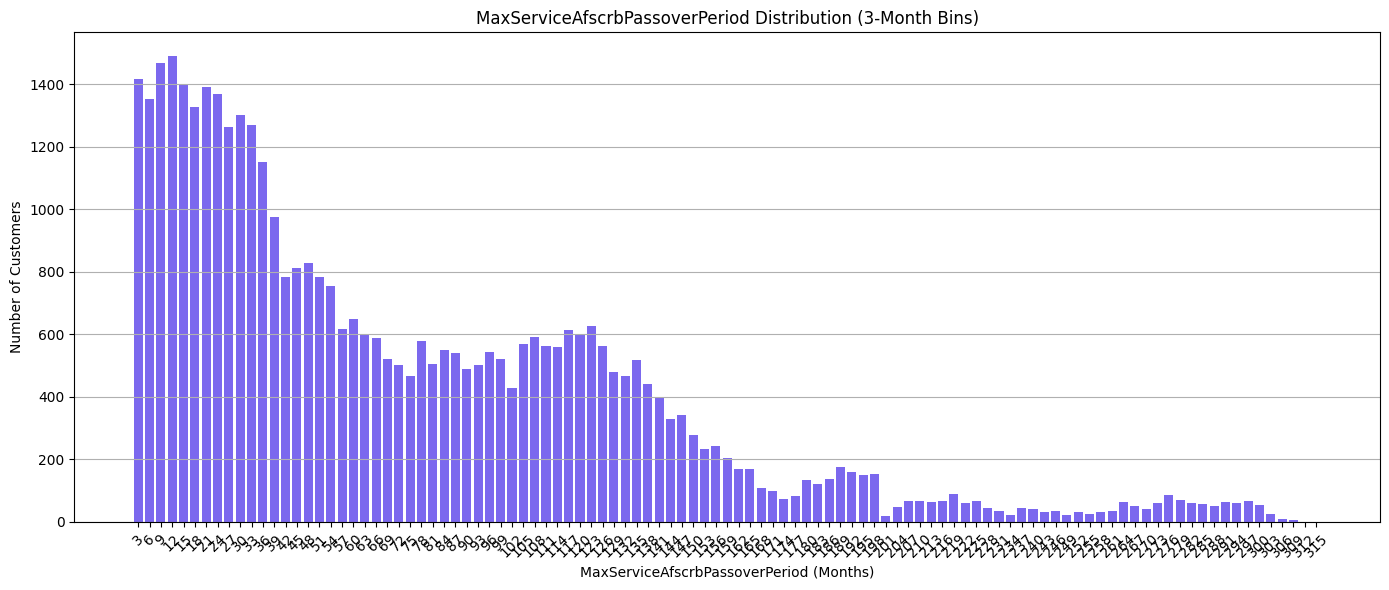

In [ ]:
# x축 레이블을 범위의 오른쪽 값만 표시하도록 변환
labels = [f"{int(interval.right)}" for interval in binned_counts.index]

# 막대그래프 다시 그리기
plt.figure(figsize=(14, 6))
plt.bar(labels, binned_counts.values, color="mediumslateblue")
plt.title("MaxServiceAfscrbPassoverPeriod Distribution (3-Month Bins)")
plt.xlabel("MaxServiceAfscrbPassoverPeriod (Months)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


<ipython-input-42-faeef89d9164>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_bin_iptv = df.groupby("ServicePeriodBin")["iptv_yn"].value_counts().unstack().fillna(0)


<Figure size 1400x600 with 0 Axes>

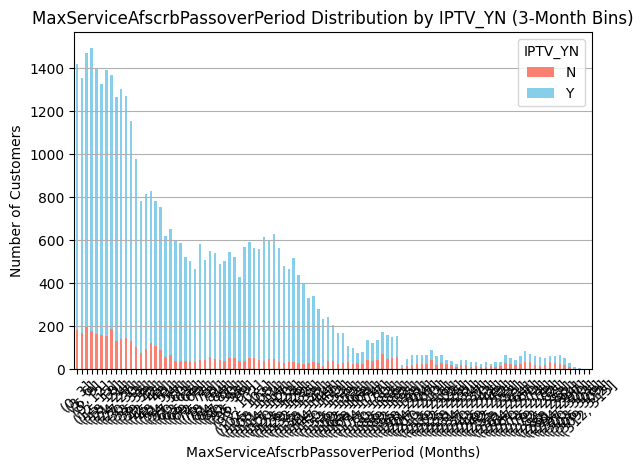

In [ ]:
# MaxServiceAfscrbPassoverPeriod를 3개월 단위 구간으로 다시 나누기
df["ServicePeriodBin"] = pd.cut(df["MaxServiceAfscrbPassoverPeriod"], bins=bins)

# IPTV 사용 여부에 따른 각 구간별 고객 수 계산
service_bin_iptv = df.groupby("ServicePeriodBin")["iptv_yn"].value_counts().unstack().fillna(0)

# 막대그래프 (stacked bar chart)
plt.figure(figsize=(14, 6))
service_bin_iptv.plot(kind="bar", stacked=True, color=["salmon", "skyblue"])
plt.title("MaxServiceAfscrbPassoverPeriod Distribution by IPTV_YN (3-Month Bins)")
plt.xlabel("MaxServiceAfscrbPassoverPeriod (Months)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.legend(title="IPTV_YN")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-43-c88644090c9d>:13: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-43-c88644090c9d>:13: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


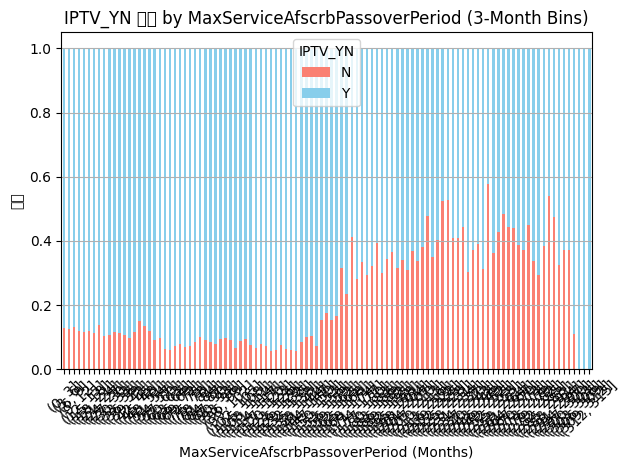

In [ ]:
# 각 구간별 IPTV 사용 여부 비율 계산
service_bin_iptv_ratio = service_bin_iptv.div(service_bin_iptv.sum(axis=1), axis=0)

# 비율 기준 stacked bar chart
plt.figure(figsize=(14, 6))
service_bin_iptv_ratio.plot(kind="bar", stacked=True, color=["salmon", "skyblue"])
plt.title("IPTV_YN 비율 by MaxServiceAfscrbPassoverPeriod (3-Month Bins)")
plt.xlabel("MaxServiceAfscrbPassoverPeriod (Months)")
plt.ylabel("비율")
plt.xticks(rotation=45)
plt.legend(title="IPTV_YN")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-44-9ab8a80d0ff0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="MaxServiceAfscrbPassoverPeriod", y="ReAgreementGroup", orient="h", palette="Set3")


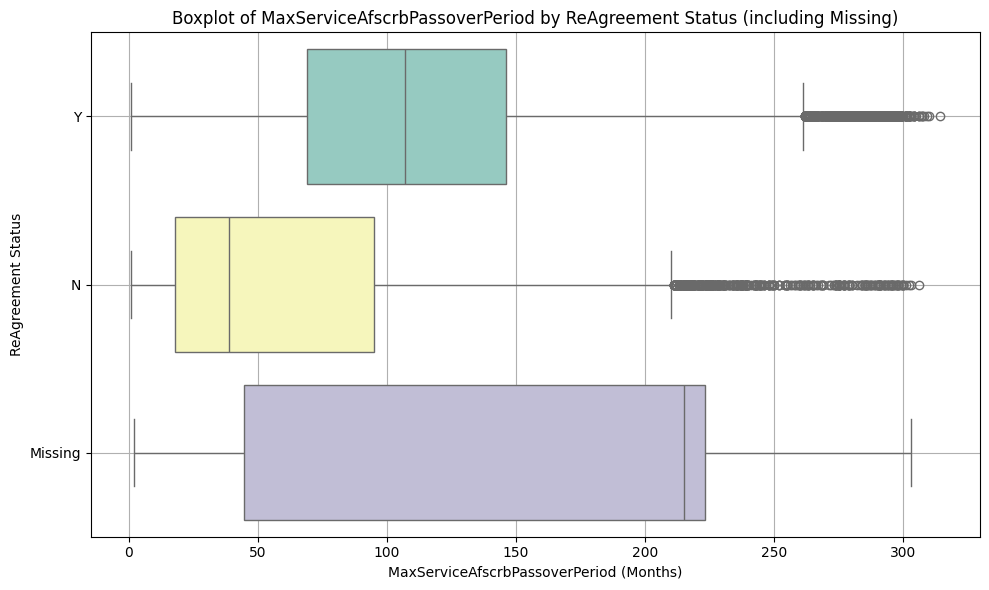

,MaxServiceAfscrbPassoverPeriod
ReAgreementGroup,
Missing,165.567568
N,59.581280
Y,120.582853


In [ ]:
# NaN 포함을 위한 별도 그룹화: 결측치를 문자열로 변환
df["ReAgreementGroup"] = df["ReAgreementYesNo"].fillna("Missing")

# 박스플롯 다시 시각화 (결측치 포함)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="MaxServiceAfscrbPassoverPeriod", y="ReAgreementGroup", orient="h", palette="Set3")
plt.title("Boxplot of MaxServiceAfscrbPassoverPeriod by ReAgreement Status (including Missing)")
plt.xlabel("MaxServiceAfscrbPassoverPeriod (Months)")
plt.ylabel("ReAgreement Status")
plt.grid(True)
plt.tight_layout()
plt.show()

# 평균 경과 기간 (결측 포함)
mean_service_period_all = df.groupby("ReAgreementGroup")["MaxServiceAfscrbPassoverPeriod"].mean()
mean_service_period_all


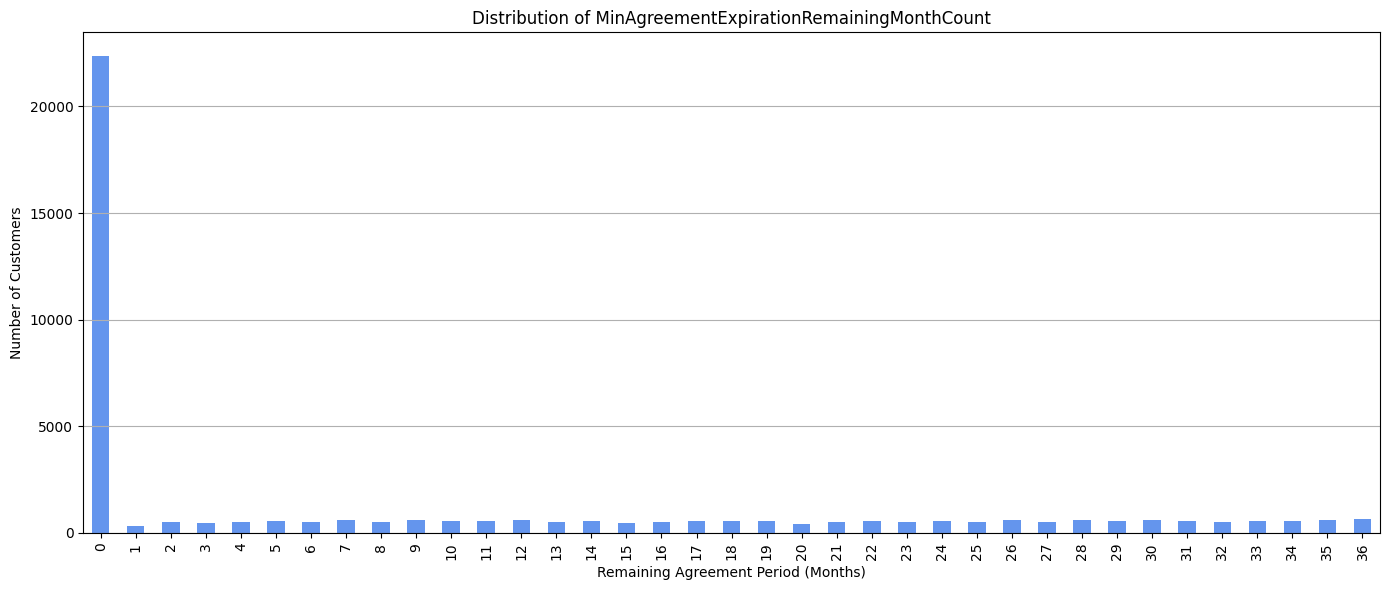

In [ ]:
# MinAgreementExpirationRemainingMonthCount를 정수로 변환하여 분포 시각화
plt.figure(figsize=(14, 6))
df["MinAgreementExpirationRemainingMonthCount"].dropna().astype(int).value_counts().sort_index().plot(kind='bar', color="cornflowerblue")
plt.title("Distribution of MinAgreementExpirationRemainingMonthCount")
plt.xlabel("Remaining Agreement Period (Months)")
plt.ylabel("Number of Customers")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# MinAgreementExpirationRemainingMonthCount가 0인 행 중 ReAgreementYesNo의 분포
expired_agreement_df = df[df["MinAgreementExpirationRemainingMonthCount"] == 0]
reagreement_counts_at_expiry = expired_agreement_df["ReAgreementYesNo"].value_counts(dropna=False)

reagreement_counts_at_expiry


,count
ReAgreementYesNo,
N,17406
Y,4880
NaN,68


<ipython-input-47-d90874bdc0b1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["AgreementGroup"].notna()],
<ipython-input-47-d90874bdc0b1>:23: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-d90874bdc0b1>:23: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-d90874bdc0b1>:23: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-d90874bdc0b1>:23: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-47-d90874bdc0b1>:23: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4

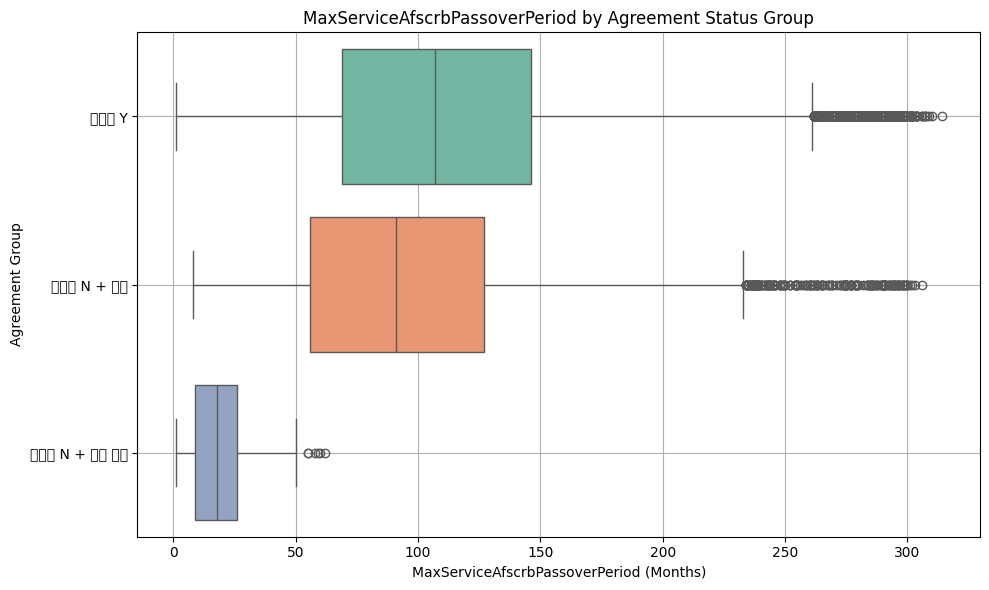

In [ ]:
# 세 그룹 정의
group_reagreement_y = df["ReAgreementYesNo"] == "Y"
group_reagreement_n_expired = (df["ReAgreementYesNo"] == "N") & (df["MinAgreementExpirationRemainingMonthCount"] == 0)
group_reagreement_n_remaining = (df["ReAgreementYesNo"] == "N") & (df["MinAgreementExpirationRemainingMonthCount"] > 0)

# 그룹 레이블 컬럼 생성
df["AgreementGroup"] = None
df.loc[group_reagreement_y, "AgreementGroup"] = "재약정 Y"
df.loc[group_reagreement_n_expired, "AgreementGroup"] = "재약정 N + 만료"
df.loc[group_reagreement_n_remaining, "AgreementGroup"] = "재약정 N + 잔여 있음"

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["AgreementGroup"].notna()],
            x="MaxServiceAfscrbPassoverPeriod",
            y="AgreementGroup",
            orient="h",
            palette="Set2")
plt.title("MaxServiceAfscrbPassoverPeriod by Agreement Status Group")
plt.xlabel("MaxServiceAfscrbPassoverPeriod (Months)")
plt.ylabel("Agreement Group")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 각 AgreementGroup별로 iptv_yn 비율 계산
iptv_ratio_by_agreement_group = (
    df[df["AgreementGroup"].notna()]
    .groupby("AgreementGroup")["iptv_yn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

iptv_ratio_by_agreement_group

iptv_yn,N,Y
AgreementGroup,,
재약정 N + 만료,0.137137,0.862863
재약정 N + 잔여 있음,0.117053,0.882947
재약정 Y,0.097488,0.902512


In [ ]:
# MonthlyDeviceNumber가 결측치인 행 필터링
monthly_device_na_df = df[df["MonthlyDeviceNumber"].isna()]

# 각 컬럼의 value_counts (결측치 포함)
wifi_counts = monthly_device_na_df["WifiSubscriptionYesNo"].value_counts(dropna=False)
internet_count_counts = monthly_device_na_df["InternetCount"].value_counts(dropna=False)
wings_count_counts = monthly_device_na_df["WingsCount"].value_counts(dropna=False)
internet_product_counts = monthly_device_na_df["InternetProductName"].value_counts(dropna=False)
iptv_counts = monthly_device_na_df["iptv_yn"].value_counts(dropna=False)

# 결과 정리
{
    "WifiSubscriptionYesNo": wifi_counts,
    "InternetCount": internet_count_counts,
    "WingsCount": wings_count_counts,
    "InternetProductName": internet_product_counts,
    "iptv_yn": iptv_counts
}

{'WifiSubscriptionYesNo': WifiSubscriptionYesNo
 N      9234
 NaN    6563
 Y      1256
 Name: count, dtype: int64,
 'InternetCount': InternetCount
 0    9642
 1    7371
 2      35
 3       3
 4       2
 Name: count, dtype: int64,
 'WingsCount': WingsCount
 0    17033
 1       20
 Name: count, dtype: int64,
 'InternetProductName': InternetProductName
 NaN      9642
 광랜       3191
 ETC      2267
 기가라이트    1680
 기가        273
 Name: count, dtype: int64,
 'iptv_yn': iptv_yn
 Y    15127
 N     1926
 Name: count, dtype: int64}

In [ ]:
df = df.drop(columns=["MobilePackageYesNo", "KidsHouseYesNo"])

In [ ]:
df

,ContractPVCName,ResidenceBuildingTypeCode,MonthlyDeviceNumber,TotalOctetReceived,TotalOctetTransmitted,Gender,ReAgreementYesNo,TransferYesNo,WifiSubscriptionYesNo,SalesSmallYesNo,...,MaxEtcConsultationCount,InternetProductName,AgeGroup,iptv_yn,customer,TotalReceived_GB,TotalTransmitted_GB,ServicePeriodBin,ReAgreementGroup,AgreementGroup
0,울산,A2,NaN,NaN,NaN,M,Y,Y,N,NaN,...,0.0,광랜,40대,Y,1,NaN,NaN,"(219.0, 222.0]",Y,재약정 Y
1,경북,A2,3.0,3.056226e+08,1.021886e+10,F,N,N,N,NaN,...,0.0,NaN,50대,Y,2,0.284633,9.517051,"(147.0, 150.0]",N,재약정 N + 만료
2,부산,A2,NaN,NaN,NaN,M,NaN,N,NaN,NaN,...,NaN,NaN,70대,Y,3,NaN,NaN,NaN,Missing,None
3,세종,A2,17.0,5.893714e+10,4.047941e+09,M,Y,Y,Y,NaN,...,0.0,기가라이트,40대,Y,4,54.889484,3.769939,"(120.0, 123.0]",Y,재약정 Y
4,경북,B1,3.0,4.241321e+09,4.982939e+10,M,N,N,Y,N,...,0.0,광랜,60대,N,5,3.950038,46.407235,"(12.0, 15.0]",N,재약정 N + 잔여 있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,경기,A2,3.0,3.961482e+09,1.088387e+08,M,N,Y,Y,N,...,0.0,광랜,60대,Y,49996,3.689417,0.101364,"(30.0, 33.0]",N,재약정 N + 잔여 있음
49996,경기,A2,NaN,NaN,NaN,M,N,N,N,N,...,0.0,NaN,50대,Y,49997,NaN,NaN,"(39.0, 42.0]",N,재약정 N + 만료
49997,대구,A2,4.0,1.063420e+11,5.415930e+10,M,N,Y,Y,N,...,0.0,광랜,50대,Y,49998,99.038705,50.439783,"(9.0, 12.0]",N,재약정 N + 잔여 있음
49998,충북,A2,8.0,1.386641e+10,3.595054e+08,M,N,N,N,N,...,0.0,NaN,30대,Y,49999,12.914104,0.334816,"(15.0, 18.0]",N,재약정 N + 만료


In [ ]:
df.to_csv("/content/iptv_data_cut.csv",index=False)